<a href="https://colab.research.google.com/github/Piyushkumar11111/weatherwise-template/blob/main/Piyush_Kumar_22882688_Final_code_starter_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🧰 Setup and Imports

This section imports commonly used packages and installs any additional tools used in the project.

- You may not need all of these unless you're using specific features (e.g. visualisations, advanced prompting).
- The notebook assumes the following packages are **pre-installed** in the provided environment or installable via pip:
  - `requests`, `matplotlib`, `pyinputplus`
  - `fetch-my-weather` (for accessing weather data easily)
  - `hands-on-ai` (for AI logging, comparisons, or prompting tools)

If you're running this notebook in **Google Colab**, uncomment the following lines to install the required packages.


# 🌦️ WeatherWise – Starter Notebook

Welcome to your **WeatherWise** project notebook! This scaffold is designed to help you build your weather advisor app using Python, visualisations, and AI-enhanced development.

---

📄 **Full Assignment Specification**  
See [`ASSIGNMENT.md`](ASSIGNMENT.md) or check the LMS for full details.

📝 **Quick Refresher**  
A one-page summary is available in [`resources/assignment-summary.md`](resources/assignment-summary.md).

---

🧠 **This Notebook Structure is Optional**  
You’re encouraged to reorganise, rename sections, or remove scaffold cells if you prefer — as long as your final version meets the requirements.

✅ You may delete this note before submission.



In [6]:
# 🧪 Optional packages — uncomment if needed in Colab or JupyterHub
!pip install fetch-my-weather
!pip install hands-on-ai
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.4/132.4 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 69.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.9/69.9 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.5/80.5 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 459.8/459.8 kB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 86.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 454.8/454.8 kB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 100.0 MB/s eta 0:00:00
  Attempting uninstall: fastcore
    Found existing i

In [2]:
import os

os.environ['HANDS_ON_AI_SERVER'] = 'http://ollama.serveur.au'
os.environ['HANDS_ON_AI_MODEL'] = 'granite3.2'
os.environ['HANDS_ON_AI_API_KEY'] = input('Enter your API key: ')

Enter your API key: .student-api-key-123


## 📦 Setup and Configuration
Import required packages and setup environment.

In [1]:
import requests
import matplotlib.pyplot as plt
import pandas as pd  # 'pandas' should be imported as 'pd' (common convention)


## 🌤️ Weather Data Functions

In [3]:
import requests
from datetime import datetime

LOCATION = "Perth"

def degrees_to_compass(degrees):
    directions = ["N", "NNE", "NE", "ENE", "E", "ESE", "SE", "SSE",
                  "S", "SSW", "SW", "WSW", "W", "WNW", "NW", "NNW"]
    return directions[round(degrees / 22.5) % 16]

def get_weather_forecast():
    try:
        url = f"https://wttr.in/{LOCATION}?format=j1"
        response = requests.get(url)
        response.raise_for_status()
        data = response.json()

        forecast = []

        for day_data in data["weather"]:
            date = day_data["date"]
            day_of_week = datetime.strptime(date, "%Y-%m-%d").strftime("%A")
            max_temp = float(day_data["maxtempC"])
            min_temp = float(day_data["mintempC"])
            conditions = set()
            times = []

            for hour in day_data["hourly"]:
                time_str = f"{int(hour['time'])//100:02d}:00"
                condition = hour["weatherDesc"][0]["value"]
                temperature = float(hour["tempC"])
                humidity = int(hour["humidity"])
                wind_speed = float(hour["windspeedKmph"]) / 3.6  # Convert to m/s
                wind_dir = degrees_to_compass(float(hour["winddirDegree"]))
                precipitation_chance = int(hour["chanceofrain"])

                conditions.add(condition)

                times.append({
                    "time": time_str,
                    "temperature": temperature,
                    "condition": condition,
                    "humidity": humidity,
                    "wind_speed": round(wind_speed, 1),
                    "wind_direction": wind_dir,
                    "precipitation_chance": precipitation_chance
                })

            forecast.append({
                "date": date,
                "day_of_week": day_of_week,
                "max_temp": max_temp,
                "min_temp": min_temp,
                "conditions": conditions,
                "times": times
            })

        return {
            "location": LOCATION,
            "forecast_days": len(forecast),
            "forecast": forecast,
            "generated_on": datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        }

    except requests.exceptions.RequestException as e:
        return {"error": f"Request failed: {str(e)}"}
    except Exception as e:
        return {"error": f"Error: {str(e)}"}

def display_forecast(weather_data):
    if "error" in weather_data:
        print(f"Error: {weather_data['error']}")
        return

    print(f"\nWeather Forecast for {weather_data['location']}")
    print(f"Generated on: {weather_data['generated_on']}")
    print("=" * 50)

    for day in weather_data["forecast"]:
        print(f"\n{day['day_of_week']}, {day['date']}")
        print(f"Temp: {day['min_temp']}°C to {day['max_temp']}°C")
        print(f"Conditions: {', '.join(day['conditions'])}")
        print("-" * 40)

        for time in day["times"]:
            print(f"{time['time']}: {time['condition']}")
            print(f"  Temp: {time['temperature']}°C")
            print(f"  Humidity: {time['humidity']}%")
            print(f"  Wind: {time['wind_speed']} m/s {time['wind_direction']}")
            print(f"  Rain chance: {time['precipitation_chance']}%")
            print("-" * 20)

if __name__ == "__main__":
    print("Fetching weather data from wttr.in...")
    weather_data = get_weather_forecast()
    display_forecast(weather_data)


Fetching weather data from wttr.in...

Weather Forecast for Perth
Generated on: 2025-05-25 13:01:07

Sunday, 2025-05-25
Temp: 12.0°C to 18.0°C
Conditions: Light rain shower, Partly Cloudy , Patchy rain nearby, Cloudy 
----------------------------------------
00:00: Patchy rain nearby
  Temp: 16.0°C
  Humidity: 65%
  Wind: 5.8 m/s W
  Rain chance: 100%
--------------------
03:00: Light rain shower
  Temp: 16.0°C
  Humidity: 70%
  Wind: 6.4 m/s WSW
  Rain chance: 100%
--------------------
06:00: Patchy rain nearby
  Temp: 17.0°C
  Humidity: 67%
  Wind: 8.1 m/s WSW
  Rain chance: 100%
--------------------
09:00: Patchy rain nearby
  Temp: 18.0°C
  Humidity: 63%
  Wind: 6.7 m/s SW
  Rain chance: 100%
--------------------
12:00: Light rain shower
  Temp: 17.0°C
  Humidity: 77%
  Wind: 6.4 m/s S
  Rain chance: 100%
--------------------
15:00: Patchy rain nearby
  Temp: 16.0°C
  Humidity: 70%
  Wind: 5.6 m/s S
  Rain chance: 100%
--------------------
18:00: Cloudy 
  Temp: 15.0°C
  Humidity: 

## 📊 Visualisation Functions

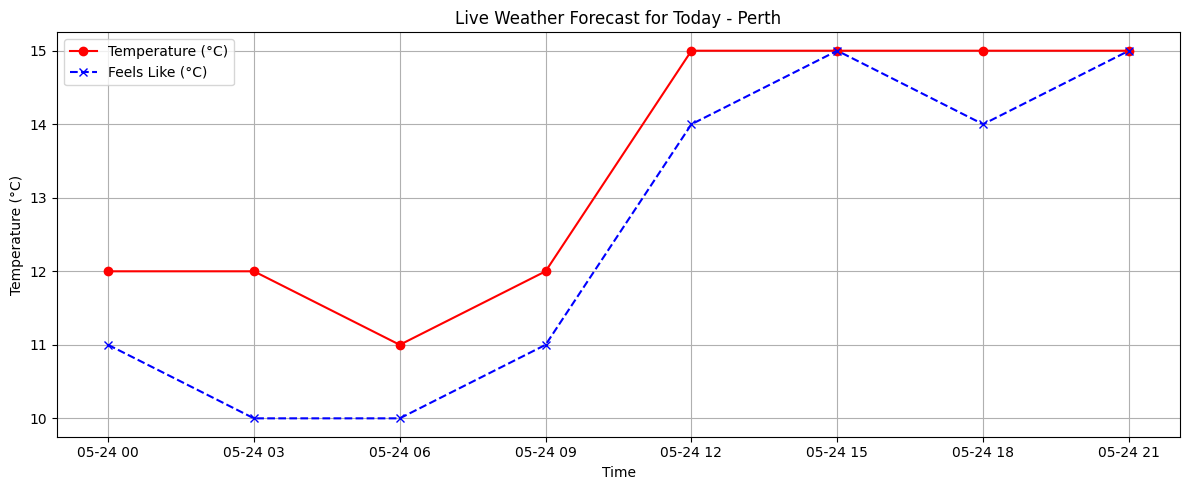

In [25]:
import requests
import matplotlib.pyplot as plt
from datetime import datetime

# Step 1: Get live weather data from wttr.in for Perth
url = "https://wttr.in/Perth?format=j1"
response = requests.get(url)
data = response.json()

# Step 2: Extract temperature data for today
times = []
temps = []
feels_like = []

for hour_data in data['weather'][0]['hourly']:
    time_str = hour_data['time'].zfill(4)  # e.g., "0" -> "0000"
    dt = datetime.strptime(data['weather'][0]['date'] + ' ' + time_str, '%Y-%m-%d %H%M')
    temp = float(hour_data['tempC'])
    feels = float(hour_data['FeelsLikeC'])

    times.append(dt)
    temps.append(temp)
    feels_like.append(feels)

# Step 3: Plot the data
plt.figure(figsize=(12, 5))
plt.plot(times, temps, label='Temperature (°C)', color='red', marker='o')
plt.plot(times, feels_like, label='Feels Like (°C)', color='blue', linestyle='--', marker='x')

plt.title('Live Weather Forecast for Today - Perth')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


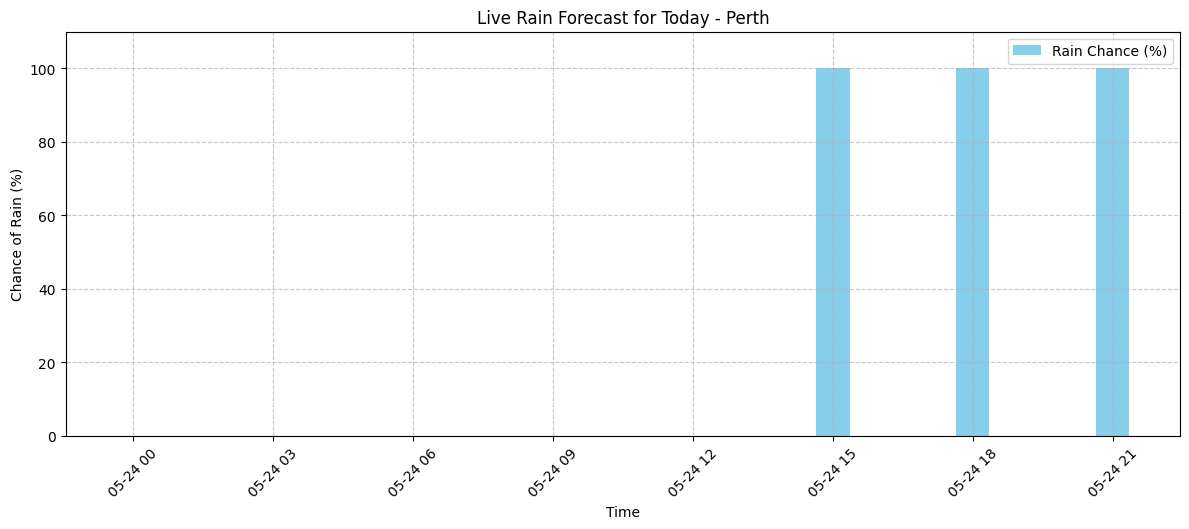

In [26]:
import requests
import matplotlib.pyplot as plt
from datetime import datetime

# Step 1: Get live weather data from wttr.in for Perth in JSON format
url = "https://wttr.in/Perth?format=j1"
response = requests.get(url)
data = response.json()

# Step 2: Extract hourly precipitation chance for today
times = []
rain_chances = []

for hour_data in data['weather'][0]['hourly']:
    # Format time and parse it
    time_str = hour_data['time'].zfill(4)  # e.g., "0" -> "0000"
    dt = datetime.strptime(data['weather'][0]['date'] + ' ' + time_str, '%Y-%m-%d %H%M')
    rain = int(hour_data.get('chanceofrain', 0))  # 'chanceofrain' is a string

    times.append(dt)
    rain_chances.append(rain)

# Step 3: Plot the rain chance
plt.figure(figsize=(12, 5))
plt.bar(times, rain_chances, width=0.03, color='skyblue', label='Rain Chance (%)')

plt.title('Live Rain Forecast for Today - Perth')
plt.xlabel('Time')
plt.ylabel('Chance of Rain (%)')
plt.ylim(0, 110)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


## 🤖 Natural Language Processing

In [32]:
import requests
import matplotlib.pyplot as plt
from datetime import datetime
import ipywidgets as widgets
from IPython.display import display, clear_output
import re

def extract_location(q):
    m = re.search(r'\b(?:in|at)\s+([A-Za-z\s]+)', q, re.I)
    return m.group(1).strip().title() if m else "Perth"

def get_weather(loc):
    url = f"https://wttr.in/{loc}?format=j1"
    data = requests.get(url).json()
    res = []
    for day in data['weather']:
        for h in day['hourly']:
            dt = datetime.strptime(day['date'] + ' ' + h['time'].zfill(4), "%Y-%m-%d %H%M")
            res.append({'datetime': dt, 'temp': int(h['tempC']), 'humidity': int(h['humidity']), 'rain': int(h['chanceofrain'])})
    return res

def handle_query(q):
    loc = extract_location(q)
    weather = get_weather(loc)
    key = 'temp'
    label = 'Temperature (°C)'
    if 'humidity' in q.lower():
        key, label = 'humidity', 'Humidity (%)'
    elif 'rain' in q.lower():
        key, label = 'rain', 'Rain Chance (%)'
    x = [d['datetime'] for d in weather[:12]]
    y = [d[key] for d in weather[:12]]
    plt.plot(x, y, marker='o')
    plt.title(f"{label} in {loc}")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def chat():
    box = widgets.Text(placeholder="Ask about the weather, e.g. 'Rain in London'")
    btn = widgets.Button(description="Ask")
    out = widgets.Output()
    def on_click(_):
        with out:
            clear_output()
            handle_query(box.value)
    btn.on_click(on_click)
    display(widgets.VBox([box, btn, out]))

chat()


## 🧭 User Interface

In [28]:
import requests
import ipywidgets as widgets
from IPython.display import display, clear_output

# Fetch live data from wttr.in
def get_weather():
    try:
        res = requests.get("https://wttr.in/Perth?format=j1")
        return res.json()
    except:
        return None

# Show selected weather detail
def show_weather(day, detail):
    clear_output()
    data = get_weather()
    if not data:
        print("❌ Cannot load weather data.")
        return

    day_data = data['weather'][{"Saturday": 0, "Sunday": 1, "Monday": 2}[day]]
    hourly = day_data['hourly']
    print(f"📅 {day} | Date: {day_data['date']}")

    if detail == "Temperature":
        print(f"🌡 Avg Temp: {day_data['avgtempC']}°C")
    elif detail == "Rain":
        print(f"🌧 Rain Chance: {min(int(h['chanceofrain']) for h in hourly)}% to {max(int(h['chanceofrain']) for h in hourly)}%")
    elif detail == "Wind":
        print(f"💨 Wind: {min(int(h['windspeedKmph']) for h in hourly)} to {max(int(h['windspeedKmph']) for h in hourly)} km/h")
    elif detail == "Clouds":
        print(f"☁️ Clouds: {min(int(h['cloudcover']) for h in hourly)}% to {max(int(h['cloudcover']) for h in hourly)}%")
    else:
        print(f"🌦 {day_data['hourly'][0]['weatherDesc'][0]['value']}")

# UI
day_picker = widgets.Dropdown(options=["Saturday", "Sunday", "Monday"], description="📆 Day:")
detail_picker = widgets.Dropdown(options=["Temperature", "Rain", "Wind", "Clouds", "Summary"], description="🌦 Detail:")
button = widgets.Button(description="Show Weather", button_style="info")

def on_click(b): show_weather(day_picker.value, detail_picker.value)
button.on_click(on_click)

display(widgets.HTML("<h3>🧭 Perth Weather (Live from wttr.in)</h3>"))
display(day_picker, detail_picker, button)


HTML(value='<h3>🧭 Perth Weather (Live from wttr.in)</h3>')

Dropdown(description='📆 Day:', options=('Saturday', 'Sunday', 'Monday'), value='Saturday')

Dropdown(description='🌦 Detail:', options=('Temperature', 'Rain', 'Wind', 'Clouds', 'Summary'), value='Tempera…

Button(button_style='info', description='Show Weather', style=ButtonStyle())

## 🧩 Main Application Logic

In [29]:
import requests

# Fetch live weather data from wttr.in
def get_weather():
    data = requests.get("https://wttr.in/Perth?format=j1").json()
    day = input("Choose day (today/tomorrow/monday): ").lower()
    attr = input("Choose detail (temperature/rain/wind/clouds/general): ").lower()

    index = {"today": 0, "tomorrow": 1, "monday": 2}.get(day, 0)
    day_data = data["weather"][index]
    hourly = day_data["hourly"]

    if attr == "temperature":
        print(f"🌡 Avg Temp: {day_data['avgtempC']}°C")
    elif attr == "rain":
        print(f"🌧 Rain Chance: {hourly[0]['chanceofrain']}%")
    elif attr == "wind":
        print(f"💨 Wind: {hourly[0]['windspeedKmph']} km/h")
    elif attr == "clouds":
        print(f"☁️ Cloud Cover: {hourly[0]['cloudcover']}%")
    else:
        desc = hourly[0]["weatherDesc"][0]["value"]
        print(f"📋 {desc}, Temp: {day_data['avgtempC']}°C, Rain: {hourly[0]['chanceofrain']}%")

get_weather()


Choose day (today/tomorrow/monday): today
Choose detail (temperature/rain/wind/clouds/general): wind
💨 Wind: 15 km/h


## 🧪 Testing and Examples

In [33]:
import requests

def get_weather_for_test(day, attr, location="Perth"):
    url = f"https://wttr.in/{location}?format=j1"
    data = requests.get(url).json()
    index = {"today": 0, "tomorrow": 1, "monday": 2}.get(day.lower(), 0)
    day_data = data["weather"][index]
    hourly = day_data["hourly"]

    if attr == "temperature":
        return f"🌡 Avg Temp in {location}: {day_data['avgtempC']}°C"
    elif attr == "rain":
        return f"🌧 Rain Chance in {location}: {hourly[0]['chanceofrain']}%"
    elif attr == "wind":
        return f"💨 Wind in {location}: {hourly[0]['windspeedKmph']} km/h"
    elif attr == "clouds":
        return f"☁️ Cloud Cover in {location}: {hourly[0]['cloudcover']}%"
    else:
        desc = hourly[0]["weatherDesc"][0]["value"]
        return f"📋 {desc} in {location}, Temp: {day_data['avgtempC']}°C, Rain: {hourly[0]['chanceofrain']}%"

# === Example Tests ===
def run_examples():
    print("🧪 Example Outputs:\n")

    print("1️⃣ Today | Temperature | Perth")
    print(get_weather_for_test("today", "temperature", "Perth"), "\n")

    print("2️⃣ Tomorrow | Rain | London")
    print(get_weather_for_test("tomorrow", "rain", "London"), "\n")

    print("3️⃣ Monday | Wind | New York")
    print(get_weather_for_test("monday", "wind", "New York"), "\n")

    print("4️⃣ Today | General | Tokyo")
    print(get_weather_for_test("today", "general", "Tokyo"), "\n")

if __name__ == "__main__":
    run_examples()



🧪 Example Outputs:

1️⃣ Today | Temperature | Perth
🌡 Avg Temp in Perth: 14°C 

2️⃣ Tomorrow | Rain | London
🌧 Rain Chance in London: 77% 

3️⃣ Monday | Wind | New York
💨 Wind in New York: 10 km/h 

4️⃣ Today | General | Tokyo
📋 Cloudy  in Tokyo, Temp: 19°C, Rain: 0% 



## 🗂️ AI Prompting Log (Optional)
Add markdown cells here summarising prompts used or link to AI conversations in the `ai-conversations/` folder.